In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
sess =tf.Session()

In [2]:
mnist = tf.keras.datasets.mnist
(train_data,train_label),(test_data,test_label) = mnist.load_data()

In [3]:
# Normalization
train_data = train_data/256.0
test_data = test_data/256.0

In [4]:
train_shape = np.shape(train_data)
train_data_flat = np.reshape(train_data,[train_shape[0],-1])
N_train = train_shape[0]
data_dim = train_data_flat.shape[1]
minibatch_size = 1000

In this notebook I try to play around with the 

In [5]:
class Layer:
    def __init__(self,inp,out,activation=tf.nn.relu):
        self.W = tf.Variable(tf.truncated_normal([inp, out], stddev=0.1))
        self.activation = activation
        self.bias = tf.Variable(np.zeros(out),dtype=tf.float32)

    def layer_output(self,x):
        return self.activation(tf.matmul(x,self.W) +self.bias)
    

In [6]:
train_x = tf.placeholder(tf.float32,(minibatch_size,data_dim))
train_y = tf.placeholder(tf.int32,(minibatch_size,))

In [7]:
layer1 = Layer(data_dim,500)
layer2 = Layer(500,400)
layer3 = Layer(400,200)
layer4 = Layer(200,10)
layer5 = Layer(10,200)
layer6 = Layer(200,400)
layer7 = Layer(400,500)
layer8 = Layer(500,data_dim)

In [8]:
l1_out = layer1.layer_output(train_x)
l2_out = layer2.layer_output(l1_out)
l3_out = layer3.layer_output(l2_out)
l4_out = layer4.layer_output(l3_out)
l5_out = layer5.layer_output(l4_out)
l6_out = layer6.layer_output(l5_out)
l7_out = layer7.layer_output(l6_out)
l8_out = layer8.layer_output(l7_out)

In [9]:
loss = tf.losses.mean_squared_error(train_x,l8_out)

In [10]:
optimizer = tf.train.AdamOptimizer(0.0001)
train = optimizer.minimize(loss)

In [11]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [12]:
# minibatching because the training is super slow

loss_arr = []
for i in range(100000):
    rand_index = np.random.choice(N_train, size=minibatch_size)
    t_x = train_data_flat[rand_index]
    t_y = train_label[rand_index]    
    _, loss_value = sess.run([train,loss],feed_dict={train_x:t_x})
    loss_arr.append(loss_value)


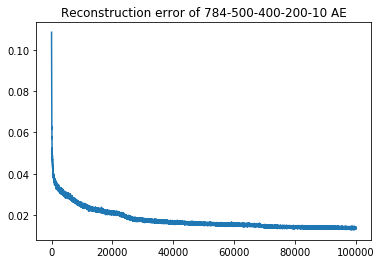

In [13]:
plt.plot(np.arange(len(loss_arr)),loss_arr)
plt.title("Reconstruction error of 784-500-400-200-10 AE")
plt.savefig("AE-MNIST-err")
plt.show()


In [14]:
def batch_eval(data,label):
    print(data.shape)
    
    ypred = []
    for i in range(int(data.shape[0]/minibatch_size)):
        t_x = data[i*minibatch_size:(i+1)*minibatch_size]
        img_pred_loss = sess.run(loss,feed_dict={train_x:t_x})
        ypred.append(img_pred_loss)
    return np.mean(ypred)

In [15]:
ypred = batch_eval(train_data_flat,train_label)
print("Loss on training data: %f"%(ypred))

(60000, 784)
Loss on training data: 0.013730


In [16]:
ypred = batch_eval(np.reshape(test_data,(10000,-1)),test_label)
print("Loss on test data: %f"%(ypred))

(10000, 784)
Loss on test data: 0.019704


In [17]:
t_x = train_data_flat[:minibatch_size]
imgs = sess.run(l8_out,feed_dict={train_x:t_x})

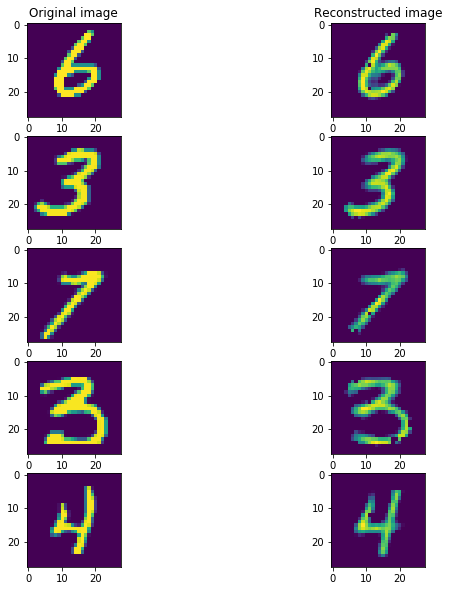

In [18]:
img_idx = np.random.choice(minibatch_size,replace=False,size=5)
fig ,ax = plt.subplots(5,2,figsize=(10,10))
for i,idx in enumerate(img_idx):
    ax[i,0].imshow(np.reshape(t_x[idx],(28,28)))
    ax[i,1].imshow(np.reshape(imgs[idx],(28,28)))

ax[0,0].set_title("Original image")
ax[0,1].set_title("Reconstructed image")
plt.show()